In [1]:
import pandas
import geopandas


In [2]:
gdf = geopandas.read_file("./francia.geojson")
gdf.head()


,code,nom,geometry
0,02,Aisne,"POLYGON ((3.17270 50.01200, 3.18220 50.01234, ..."
1,10,Aube,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ..."
2,14,Calvados,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240..."
3,15,Cantal,"POLYGON ((2.50841 45.47850, 2.52444 45.48070, ..."
4,28,Eure-et-Loir,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ..."


In [3]:
gdf["geometry"].intersects(gdf.iloc[0].geometry)


0      True
1     False
2     False
3     False
4     False
      ...  
91    False
92    False
93    False
94    False
95    False
Length: 96, dtype: bool

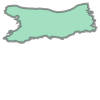

In [4]:
geom1 = gdf.loc[2, "geometry"]
geom2 = gdf.loc[3, "geometry"]

geom1


In [6]:
dfx = pandas.DataFrame()
for index1 in gdf.index:
    for index2 in gdf.index:
        geom1 = gdf.loc[index1, "geometry"]
        geom2 = gdf.loc[index2, "geometry"]
        
        if index1 == index2:
            dfx.loc[gdf.loc[index1, "nom"], gdf.loc[index2, "nom"]] = 0
        else:
            dfx.loc[gdf.loc[index1, "nom"], gdf.loc[index2, "nom"]] = int(geom1.intersects(geom2))
dfx


,Aisne,Aube,Calvados,Cantal,Eure-et-Loir,Ille-et-Vilaine,Jura,Landes,Loire,Loiret,...,Haute-Saône,Sarthe,Somme,Essonne,Val-d'Oise,Loir-et-Cher,Mayenne,Meurthe-et-Moselle,Deux-Sèvres,Territoire de Belfort
Aisne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aube,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Calvados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cantal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eure-et-Loir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Loir-et-Cher,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mayenne,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Meurthe-et-Moselle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Deux-Sèvres,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
dfx.to_excel("colindancias_francia.xlsx")